   Transaction ID                     Date Customer ID  Gender  Age  \
0               1  2023-11-24 00:00:00.000     CUST001    Male   34   
1               2  2023-02-27 00:00:00.000     CUST002  Female   26   
2               3  2023-01-13 00:00:00.000     CUST003    Male   50   
3               4  2023-05-21 00:00:00.000     CUST004    Male   37   
4               5  2023-05-06 00:00:00.000     CUST005    Male   30   

  Product Category  Quantity  Price per Unit  Total Amount  
0           Beauty         3              50           150  
1         Clothing         2             500          1000  
2      Electronics         1              30            30  
3         Clothing         1             500           500  
4           Beauty         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Trans

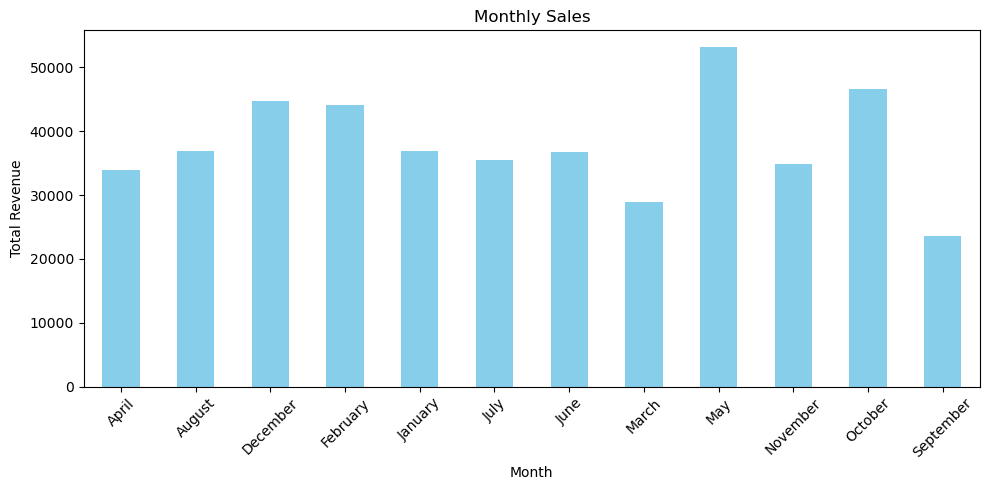

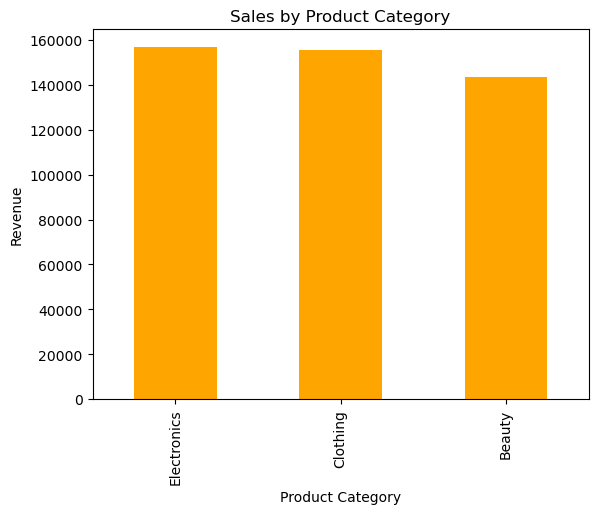

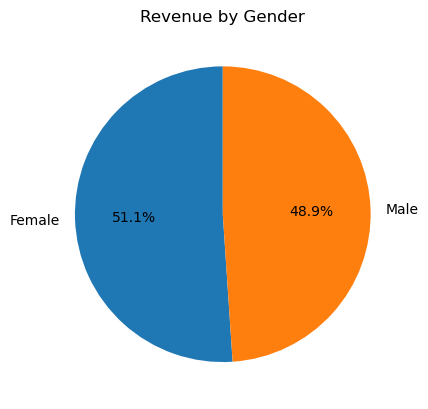

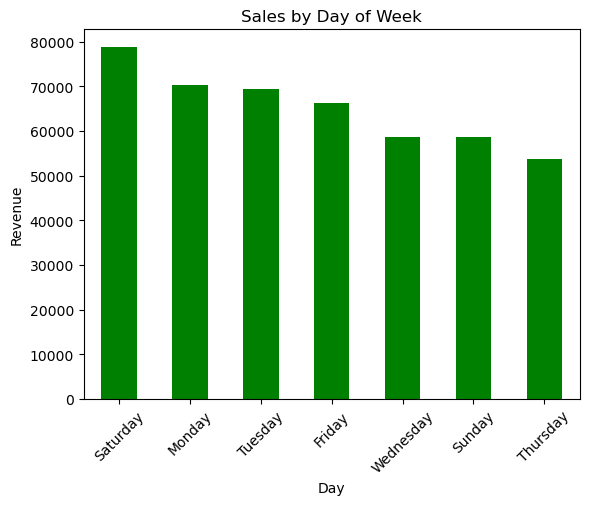

Average Order Value: 456.0
Top 5 Customers:
 Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
Name: Total Amount, dtype: int64


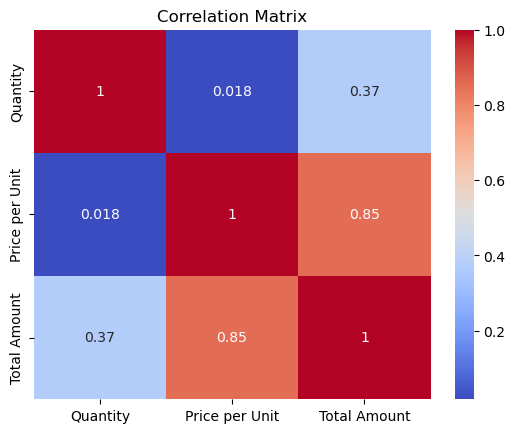

In [27]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
df = pd.read_csv('sales.csv')  # Replace with your file name

# Quick look at data
print(df.head())
print(df.info())
print(df.describe())

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Year
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day_name()

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values (based on context)
df.dropna(inplace=True)

# Ensure numeric types
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Age groups
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18–25', '26–35', '36–45', '46–60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

print("Total Revenue:", df['Total Amount'].sum())
print("Total Quantity Sold:", df['Quantity'].sum())

monthly_sales = df.groupby('Month')['Total Amount'].sum()

monthly_sales.plot(kind='bar', figsize=(10,5), color='skyblue', title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', color='orange', title='Sales by Product Category')
plt.ylabel('Revenue')
plt.show()

gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Revenue by Gender')
plt.ylabel('')
plt.show()


day_sales = df.groupby('Day')['Total Amount'].sum().sort_values(ascending=False)
day_sales.plot(kind='bar', color='green', title='Sales by Day of Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

aov = df['Total Amount'].sum() / df['Transaction ID'].nunique()
print("Average Order Value:", round(aov, 2))

top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers:\n", top_customers)

sns.heatmap(df[['Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
